Avocado is a fruit consumed by people heavily in the United States. 
The table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.Our task is to make a model that can predict the Average Price.

In [184]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [185]:
df=pd.read_csv('avocado.csv')

In [186]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [187]:
df.shape

(1517, 14)

In [188]:
df.dtypes


Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [189]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values present

In [190]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [ ]:
#converting Date into date-time

In [191]:
df['Month']=df['Date'].dt.month

In [192]:
df['Day']=df['Date'].dt.day

In [193]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [216]:
#df.drop(['Date','type','Unnamed: 0'],axis=1,inplace=True)

column Date,type and Unnamed:0 were dropped as they were not required

In [217]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0.0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0.0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0.0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0.0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0.0,11,29


In [410]:
# converting categorical column 'region 'into numerical column
from sklearn.preprocessing import OrdinalEncoder

In [219]:
oe=OrdinalEncoder()

In [220]:
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))

In [221]:
df['region'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: region, dtype: float64

In [222]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000,12.000000,31.000000


In [223]:
df.shape

(1517, 13)

In [224]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month',
       'Day'],
      dtype='object')

# Univariate analysis

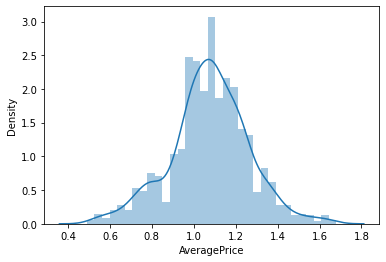

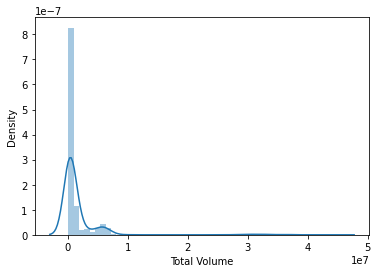

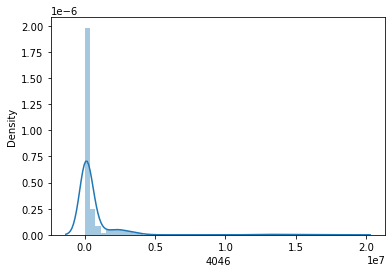

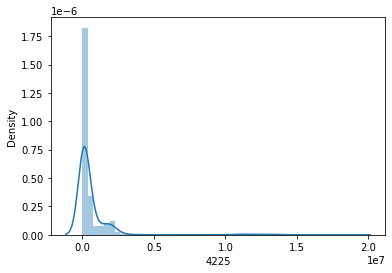

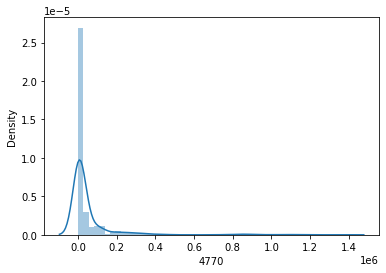

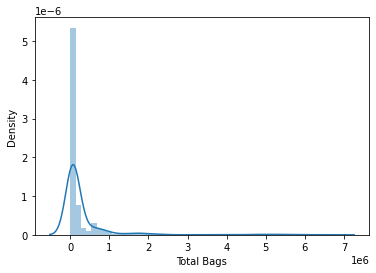

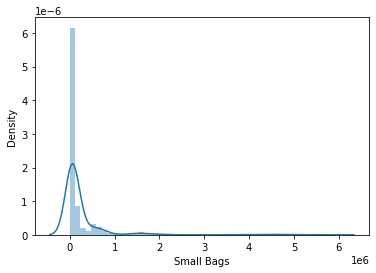

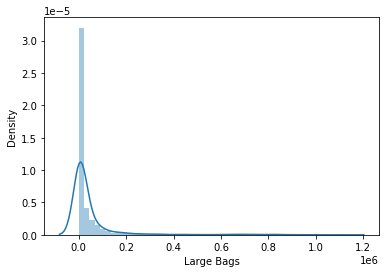

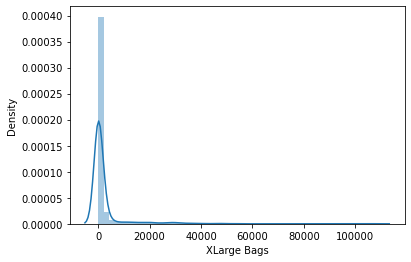

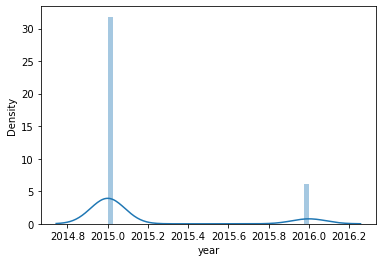

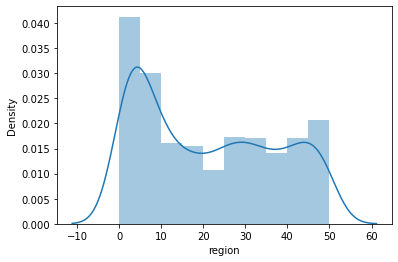

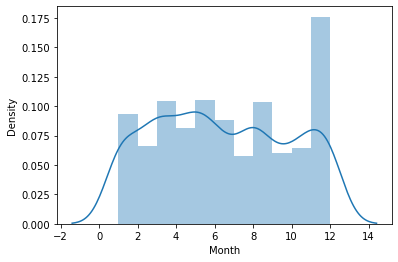

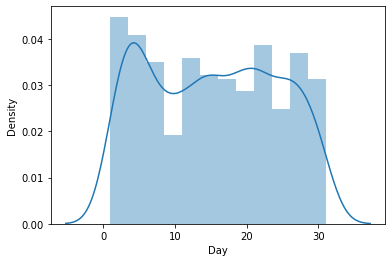

In [225]:
columns=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region', 'Month',
       'Day']
for i in df[columns]:
    plt.figure()
    sb.distplot(df[i])
    
    

distribution of all the features were observed by distplot.skewness was observed in all the columns except target column which was normally distributed.

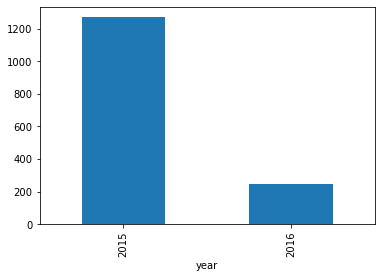

In [226]:
#relationship between year and totalvolume was seen
df.groupby('year')['Total Volume'].nunique().plot(kind='bar')
plt.show()

More Volume of avocado was seen to be sold in the year 2015

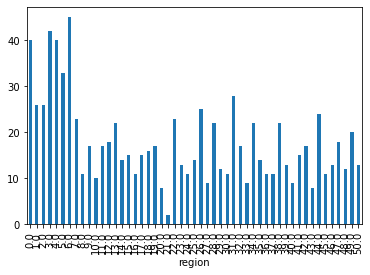

In [227]:
df.groupby('region')['AveragePrice'].nunique().plot(kind='bar')
plt.show()

Average price of avocado was seen to differ region_wise.

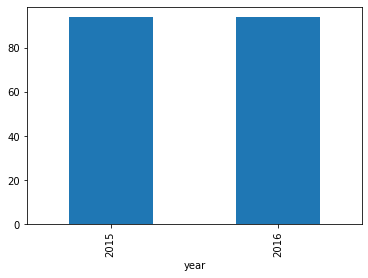

In [228]:
df.groupby('year')['AveragePrice'].nunique().plot(kind='bar')
plt.show()

Also the price was almost same in both the years.

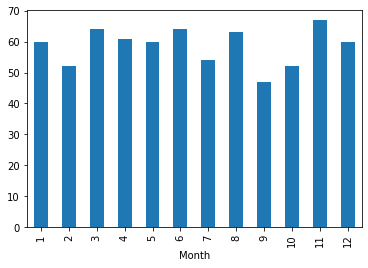

In [229]:
df.groupby('Month')['AveragePrice'].nunique().plot(kind='bar')
plt.show()

The price of avocado was seen maximum in November and least in september

# multivariate analysis

In [230]:
cor=df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

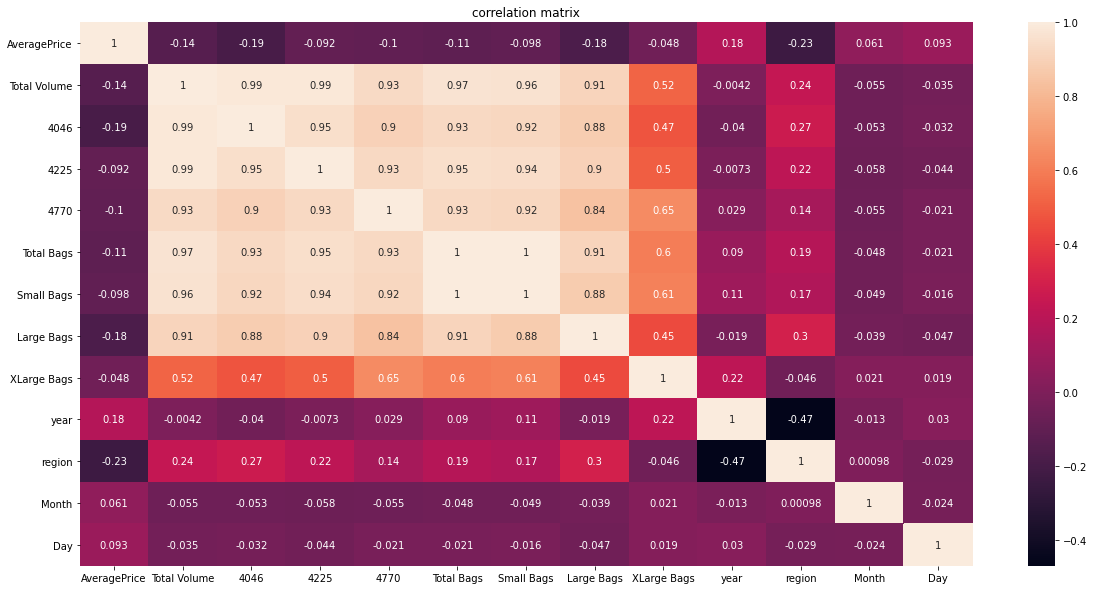

In [231]:
plt.figure(figsize=[20,10])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show

It was found that variety 4225 and 4046 were sold more as compared to 4770.Also smaller bage were more preferred than large bags and XL bags were least preferred

<AxesSubplot:>

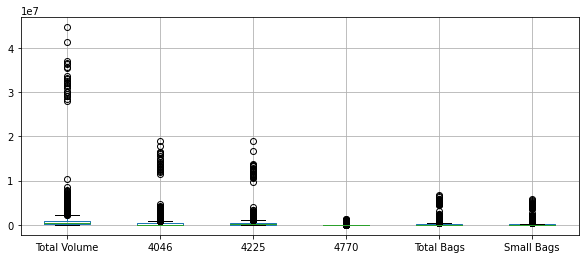

In [232]:
df.iloc[:,1:7].boxplot(figsize=[10,4])

<AxesSubplot:>

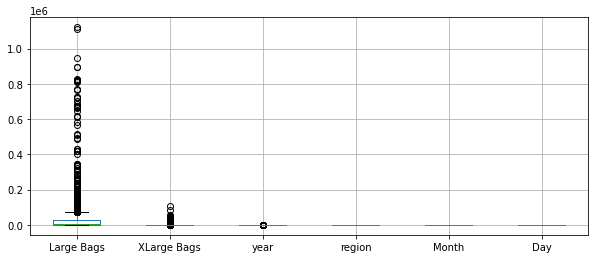

In [233]:
df.iloc[:,7:].boxplot(figsize=[10,4])

Extreme outliers were seen in 'total volume',"large bags",'4046' and '4225'

# outlier removal

In [234]:
from scipy.stats import zscore

In [235]:
z=np.abs(zscore(df))

In [236]:
new_df=df[(z<3).all(axis=1)]

In [237]:
df.shape

(1517, 13)

In [238]:
new_df.shape

(1436, 13)

In [239]:
(1517-1436)*100/1517

5.339485827290705

loss of data=5.3 percent

In [240]:
x=new_df.iloc[:,1:]

In [241]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0.0,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0.0,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0.0,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0.0,6,12
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0.0,11,29


In [242]:
y=new_df.iloc[:,0]

In [243]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

# Finding skewness

In [244]:
x.skew()

Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
Month           0.111898
Day             0.041849
dtype: float64

# Treating skewness

In [245]:
from sklearn.preprocessing import power_transform

In [246]:
df1=power_transform(x)

In [247]:
df1=pd.DataFrame(df1,columns=x.columns)

In [248]:
df1.skew()

Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region         -0.219708
Month          -0.136692
Day            -0.212755
dtype: float64

In [249]:
x=df1

# Scaling

In [250]:
from sklearn.preprocessing import StandardScaler

In [251]:
scale=StandardScaler()


In [252]:
df2=scale.fit_transform(x)

In [253]:
df2=pd.DataFrame(df2,columns=x.columns)

In [254]:
df2.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,0.0,-1.729267,-0.506157,-1.648277,-2.007481,-1.828720,-1.060475,-0.846959,-0.41387,-1.809066,1.504738,1.228848
1,0.0,-1.884928,-0.633773,-1.594456,-1.912024,-1.731311,-1.050679,-0.846959,-0.41387,-1.809066,1.504738,0.584693
2,0.0,-1.825915,-0.060328,-1.356590,-2.078394,-1.903000,-1.038178,-0.846959,-0.41387,-1.809066,1.504738,-0.138461
3,0.0,-1.696994,-0.327182,-1.531747,-2.451762,-2.296677,-0.979183,-0.846959,-0.41387,-1.809066,-0.000152,-0.250943
4,0.0,-1.764471,-0.645393,-1.519205,-2.382008,-2.235649,-0.886387,-0.846959,-0.41387,-1.809066,1.275630,1.402403


In [255]:
x=df2

# Model Building

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Best Random State

In [257]:
from sklearn.linear_model import LinearRegression
maxaccu=0
maxrs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lnr=LinearRegression()
    lnr.fit(x_train,y_train)
    predlnr=lnr.predict(x_test)
    r2=r2_score(y_test,predlnr)
    if r2>maxaccu:
        maxaccu=r2
        maxrs=i
print(maxaccu)
print(maxrs)

0.4386841009247443
201


In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=201)

In [259]:
lnr=LinearRegression()
lnr.fit(x_train,y_train)
lnr.coef_
lnr.score(x_train,y_train)

0.32171735473516483

In [260]:
predlnr=lnr.predict(x_test)
print('mae_lnr',mean_absolute_error(y_test,predlnr))
print('mse_lnr',mean_squared_error(y_test,predlnr))
print('r2 score_lnr',r2_score(y_test,predlnr))

mae_lnr 0.11687225470687566
mse_lnr 0.022620954283466024
r2 score_lnr 0.4386841009247443


In [261]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9715444321481711

In [262]:
predrfr=rfr.predict(x_test)
print('mae_rfr',mean_absolute_error(y_test,predrfr))
print('mse_rfr',mean_squared_error(y_test,predrfr))
print('r2 score_rfr',r2_score(y_test,predrfr))

mae_rfr 0.062092807424593936
mse_rfr 0.007131791183294663
r2 score_rfr 0.8230318787658745


In [263]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [264]:
preddtr=dtr.predict(x_test)
print('mae_dtr',mean_absolute_error(y_test,preddtr))
print('mse_dtr',mean_squared_error(y_test,preddtr))
print('r2 score_dtr',r2_score(y_test,preddtr))

mae_dtr 0.09336426914153131
mse_dtr 0.01690394431554524
r2 score_dtr 0.5805458698825283


# cross validation

In [265]:
from sklearn.model_selection import cross_val_score
print ("cross val score for linear regression is:",cross_val_score(lnr,x,y,scoring='r2',cv=3).mean())
print ("cross val score for random forest regressor is:",cross_val_score(rfr,x,y,scoring='r2',cv=3).mean())
print ("cross val score for decision tree regressor is:",cross_val_score(dtr,x,y,scoring='r2',cv=3).mean())

cross val score for linear regression is: 0.08959198900069121
cross val score for random forest regressor is: 0.20986500291623622
cross val score for decision tree regressor is: -0.0895454914287972


# Hyperparameter tuning of Random Forest Regressor

In [266]:
from sklearn.model_selection import RandomizedSearchCV

In [267]:
rfr=RandomForestRegressor()

In [355]:
n_estimators= [100,200,400,500,800,1000]
max_features= ['auto','sqrt','log2']
min_samples_split= [2,4,5,7,10]
min_samples_leaf= [1,2,5,7,9]

In [356]:
params={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [357]:
params

{'n_estimators': [100, 200, 400, 500, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 5, 7, 10],
 'min_samples_leaf': [1, 2, 5, 7, 9]}

In [358]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [359]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 10],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=42, verbose=2)

In [360]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [397]:
final_model=RandomForestRegressor(n_estimators=500,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='sqrt')

In [398]:
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)

0.9733422452077614

# Final Model with best parameter

In [406]:
predfinal=final_model.predict(x_test)
print('mae_final_model',mean_absolute_error(y_test,predfinal))
print('mse_final_model',mean_squared_error(y_test,predfinal))
print('r2 score_final_model',r2_score(y_test,predfinal))

mae_final_model 0.0631161484918794
mse_final_model 0.007070461758700715
r2 score_final_model 0.8245537058592116


# Saving the best model

In [407]:
import joblib

In [408]:
filename='finalavocadomodel.pkl'

In [409]:
joblib.dump(final_model,'finalavocadomodel.pkl')

['finalavocadomodel.pkl']